# Agregación de datos por categoría

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd

In [0]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [0]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male']

In [5]:
income_data[1:10]

['Middle Class',
 'Rich',
 'Rich',
 'Poor',
 'Poor',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Middle Class']

In [0]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [0]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,196.343940,60.909064,40.451221,21385.958772
1,Male,Middle Class,153.697110,48.005164,48.163870,19757.653998
2,Female,Rich,146.713926,53.476714,31.144568,20279.476735
3,Male,Rich,183.988501,71.785466,34.192437,19778.532678
4,Male,Poor,179.805582,58.547234,32.501684,19346.337986


## Agrupación de datos

In [0]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': Int64Index([  0,   2,   5,   6,   7,   8,  11,  12,  14,  15,
             ...
             480, 481, 484, 485, 488, 490, 491, 492, 493, 495],
            dtype='int64', length=234),
 'Male': Int64Index([  1,   3,   4,   9,  10,  13,  16,  17,  18,  19,
             ...
             482, 483, 486, 487, 489, 494, 496, 497, 498, 499],
            dtype='int64', length=266)}

In [11]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
0    Female            Rich  196.343940  60.909064  40.451221  21385.958772
2    Female            Rich  146.713926  53.476714  31.144568  20279.476735
5    Female            Poor  172.074560  28.192775  42.997942  21277.967078
6    Female            Rich  182.532298  63.768421  57.426784  18952.149135
7    Female    Middle Class  166.360472  33.332115  19.958657  19611.989916
..      ...             ...         ...        ...        ...           ...
490  Female            Rich  150.092007  67.726508  23.798001  19656.450662
491  Female    Middle Class  156.545084  55.503196  26.584817  19038.000602
492  Female    Middle Class  173.475638  52.248953  64.993034  20516.979828
493  Female            Rich  169.567790  63.484671  29.763336  20821.406697
495  Female    Middle Class  180.672252  51.029436  17.900334  20043.401932

[234 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  

In [12]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,196.343940,60.909064,40.451221,21385.958772
2,Female,Rich,146.713926,53.476714,31.144568,20279.476735
5,Female,Poor,172.074560,28.192775,42.997942,21277.967078
6,Female,Rich,182.532298,63.768421,57.426784,18952.149135
7,Female,Middle Class,166.360472,33.332115,19.958657,19611.989916
...,...,...,...,...,...,...
490,Female,Rich,150.092007,67.726508,23.798001,19656.450662
491,Female,Middle Class,156.545084,55.503196,26.584817,19038.000602
492,Female,Middle Class,173.475638,52.248953,64.993034,20516.979828
493,Female,Rich,169.567790,63.484671,29.763336,20821.406697


In [0]:
double_group = data.groupby(["Gender", "Economic Status"])

In [14]:
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
7    Female    Middle Class  166.360472  33.332115  19.958657  19611.989916
8    Female    Middle Class  128.918824  76.401772  31.228420  21412.474051
20   Female    Middle Class  178.792011  60.561514  42.988117  18128.069658
30   Female    Middle Class  189.867726  54.644142  41.009437  19217.893656
32   Female    Middle Class  175.316787  94.572508  31.077942  20033.912034
..      ...             ...         ...        ...        ...           ...
481  Female    Middle Class  198.371944  58.787997  30.735950  19162.782868
488  Female    Middle Class  206.483490  77.263171  40.110498  20595.400103
491  Female    Middle Class  156.545084  55.503196  26.584817  19038.000602
492  Female    Middle Class  173.475638  52.248953  64.993034  20516.979828
495  Female    Middle Class  180.672252  51.029436  17.900334  20043.401932

[82 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     13109.758475  5114.396788  2443.013144  1.609475e+06
       Poor             12105.710834  5027.709669  2197.896111  1.477014e+06
       Rich             12213.117719  5000.741333  2327.382814  1.521338e+06
Male   Middle Class     12761.733997  4959.605170  2198.240962  1.512304e+06
       Poor             15301.173067  5726.156969  2669.090332  1.847747e+06
       Rich             15092.221858  6539.546423  2925.118149  1.906379e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     159.875103  62.370693  29.792843  19627.745015
       Poor             161.409478  67.036129  29.305281  19693.513975
       Rich             158.611918  64.944693  30.225751  19757.636531
Male   Middle Class     165.736805  64.410457  28.548584  19640.313086
       Poor             164.528743  61.571580  28.699896  19868.250726
       Rich             157.210644  68.120275  30.469981  19858.115811

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       82
        Poor               75
        Rich               77
Male    Middle Class       77
        Poor               93
        Rich               96
dtype: int64

In [19]:
double_group.describe()

Height              ...        Income              
                        count        mean  ...           75%           max
Gender Economic Status                     ...                            
Female Middle Class      82.0  159.875103  ...  20359.835287  21488.883196
       Poor              75.0  161.409478  ...  20303.299142  21489.193581
       Rich              77.0  158.611918  ...  20665.291519  21492.614880
Male   Middle Class      77.0  165.736805  ...  20363.599172  21453.931293
       Poor              93.0  164.528743  ...  20851.226702  21492.894772
       Rich              96.0  157.210644  ...  20686.405907  21497.428517

[6 rows x 32 columns]

In [0]:
grouped_income = double_group["Income"]

In [21]:
grouped_income.describe()

count          mean  ...           75%           max
Gender Economic Status                       ...                            
Female Middle Class      82.0  19627.745015  ...  20359.835287  21488.883196
       Poor              75.0  19693.513975  ...  20303.299142  21489.193581
       Rich              77.0  19757.636531  ...  20665.291519  21492.614880
Male   Middle Class      77.0  19640.313086  ...  20363.599172  21453.931293
       Poor              93.0  19868.250726  ...  20851.226702  21492.894772
       Rich              96.0  19858.115811  ...  20686.405907  21497.428517

[6 rows x 8 columns]

In [22]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.609475e+06  29.792843  30.373012
       Poor             1.477014e+06  29.305281  31.477731
       Rich             1.521338e+06  30.225751  28.634846
Male   Middle Class     1.512304e+06  28.548584  29.776044
       Poor             1.847747e+06  28.699896  27.822572
       Rich             1.906379e+06  30.469981  30.459835

In [23]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.792843  5.296115
       Poor             29.305281  5.162266
       Rich             30.225751  5.575445
Male   Middle Class     28.548584  5.602612
       Poor             28.699896  5.945550
       Rich             30.469981  5.188337

In [24]:
double_group.aggregate([np.sum, np.mean, np.std])

Height              ...        Income             
                                 sum        mean  ...          mean          std
Gender Economic Status                            ...                           
Female Middle Class     13109.758475  159.875103  ...  19627.745015   994.118644
       Poor             12105.710834  161.409478  ...  19693.513975   940.946942
       Rich             12213.117719  158.611918  ...  19757.636531  1019.800743
Male   Middle Class     12761.733997  165.736805  ...  19640.313086   995.486333
       Poor             15301.173067  164.528743  ...  19868.250726  1052.295893
       Rich             15092.221858  157.210644  ...  19858.115811   978.823389

[6 rows x 12 columns]

In [25]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.296115  2.665104  2.381414  19.865368
       Poor             5.162266  2.692041  2.421046  21.070403
       Rich             5.575445  2.489051  2.686889  19.501061
Male   Middle Class     5.602612  2.312436  2.632110  19.858739
       Poor             5.945550  2.545868  2.408529  18.983195
       Rich             5.188337  2.710532  2.690210  20.394239

## Filtrado de datos

In [26]:
double_group["Age"].filter(lambda x: x.sum()>2400)

3      34.192437
4      32.501684
7      19.958657
8      31.228420
10     38.757674
         ...    
492    64.993034
494    31.240249
495    17.900334
496    27.617103
498    35.257657
Name: Age, Length: 271, dtype: float64

## Transformación de variables

In [0]:
zscore = lambda x : (x - x.mean())/x.std()

In [0]:
z_group = double_group.transform(zscore)

In [0]:
import matplotlib.pyplot as plt

(array([  6.,  10.,  38.,  80., 111., 104.,  80.,  47.,  15.,   9.]),
 array([-2.92196658, -2.35012721, -1.77828785, -1.20644848, -0.63460912,
        -0.06276976,  0.50906961,  1.08090897,  1.65274833,  2.2245877 ,
         2.79642706]),
 <a list of 10 Patch objects>)

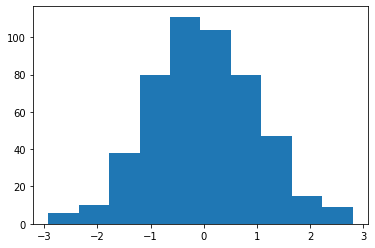

In [30]:
plt.hist(z_group["Age"])

In [0]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [32]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,196.343940,60.909064,40.451221,21385.958772
1,153.697110,48.005164,48.163870,19757.653998
2,146.713926,53.476714,31.144568,20279.476735
3,183.988501,71.785466,34.192437,19778.532678
4,179.805582,58.547234,32.501684,19346.337986
...,...,...,...,...
495,180.672252,51.029436,17.900334,20043.401932
496,151.602650,43.765061,27.617103,20241.297735
497,149.973149,67.190925,36.479521,19335.750899
498,163.669365,98.571932,35.257657,18888.280373


## Operaciones diversas muy útiles

In [33]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,196.343940,60.909064,40.451221,21385.958772
1,Male,Middle Class,153.697110,48.005164,48.163870,19757.653998
3,Male,Rich,183.988501,71.785466,34.192437,19778.532678
4,Male,Poor,179.805582,58.547234,32.501684,19346.337986
5,Female,Poor,172.074560,28.192775,42.997942,21277.967078
7,Female,Middle Class,166.360472,33.332115,19.958657,19611.989916


In [34]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
484,Female,Poor,237.863120,19.951759,49.066417,19810.325445
487,Male,Poor,227.539516,57.374036,25.997146,19157.948395
493,Female,Rich,169.567790,63.484671,29.763336,20821.406697
495,Female,Middle Class,180.672252,51.029436,17.900334,20043.401932
498,Male,Rich,163.669365,98.571932,35.257657,18888.280373
499,Male,Middle Class,148.236420,90.327894,13.374767,19467.309309


In [35]:
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     110.180551  68.190065  49.949398  19487.156361
       Poor             158.853184  63.085928  25.005120  20216.239204
       Rich             162.750233  65.951638  40.062883  18023.726084
Male   Middle Class     161.936648  70.117613   4.067120  19697.088560
       Poor             158.631750  52.472696  24.187545  19964.779021
       Rich             171.473068  45.510527  47.831414  20692.308396

In [36]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Economic Status                                               
Male   Poor             179.93339  76.802942  21.885402  20715.359892
       Rich             164.70270  86.880958  26.744570  19193.082787

In [0]:
data_sorted = data.sort_values(["Age", "Income"])

In [38]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
59,Female,Poor,219.118989,106.348681,-3.837400,21298.802624
148,Female,Middle Class,140.433589,88.161987,-3.010737,19892.145392
22,Female,Rich,220.042892,66.970892,-2.860013,18189.632418
154,Female,Middle Class,101.836328,78.121454,-2.139509,19793.479229
89,Male,Poor,193.682572,79.271949,-1.181704,21008.166187
259,Male,Rich,142.594132,67.007006,3.368029,20693.817605
209,Male,Middle Class,161.936648,70.117613,4.067120,19697.088560
299,Male,Poor,194.034042,52.824096,5.591800,21409.162676
402,Male,Middle Class,149.062605,52.035421,6.173861,21435.420795
354,Male,Poor,189.448738,78.337713,6.195454,21369.689456


In [0]:
age_grouped = data_sorted.groupby("Gender")

In [40]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
59,Female,Poor,219.118989,106.348681,-3.837400,21298.802624
89,Male,Poor,193.682572,79.271949,-1.181704,21008.166187


In [41]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
423,Male,Poor,165.152608,61.613466,59.082634,20577.920332
492,Female,Middle Class,173.475638,52.248953,64.993034,20516.979828


# Conjunto de entrenamiento y conjunto de testing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/yimmy/Desktop/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [3]:
len(data)

3333

## Dividir utilizando la distribución normal

In [7]:
a = np.random.randn(len(data))

(array([  3.,  48., 240., 629., 945., 865., 454., 135.,  13.,   1.]),
 array([-3.60383591, -2.84375149, -2.08366707, -1.32358265, -0.56349823,
         0.19658619,  0.95667061,  1.71675504,  2.47683946,  3.23692388,
         3.9970083 ]),
 <BarContainer object of 10 artists>)

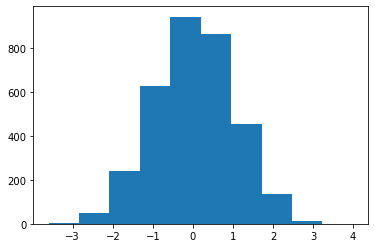

In [8]:
plt.hist(a)

In [9]:
check = (a<0.75) # No es el 75% de los datos, son los números que son < 0.75!!! 

In [10]:
check

array([ True, False,  True, ...,  True,  True,  True])

(array([ 810.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2523.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

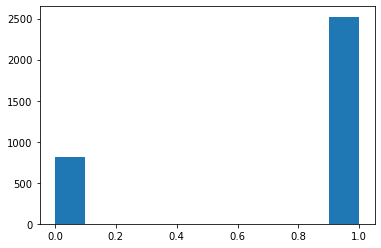

In [11]:
plt.hist(check.astype(int))#Ha cambiado en la versión 3.7 de python y necesita hacer un cast de bool a entero

In [13]:
training = data[check]
testing = data[~check] #negacion

In [14]:
len(training)

2523

In [15]:
len(testing)

810

## Con la libreria sklearn

In [17]:
from sklearn.model_selection import train_test_split# Ha cambiado en la 3.7 de Python

In [18]:
train, test = train_test_split(data, test_size = 0.2)

In [19]:
len(train)

2666

In [20]:
len(test)

667

## Usando una función de shuffle

In [21]:
import numpy as np

In [22]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [23]:
import sklearn

In [24]:
data = sklearn.utils.shuffle(data) #Aleatoriedad de las filas

In [26]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
297,AR,36,415,346-9317,no,no,0,157.6,117,26.79,...,58,15.67,240.4,99,10.82,11.9,1,3.21,0,False.
1165,VT,50,415,387-5891,yes,yes,26,307.1,94,52.21,...,78,24.60,174.9,109,7.87,8.0,3,2.16,0,False.
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True.
1533,WY,127,510,400-2181,yes,no,0,242.2,102,41.17,...,80,19.22,252.0,96,11.34,13.9,5,3.75,2,True.
2451,NC,182,415,379-6970,no,no,0,279.5,118,47.52,...,113,17.27,174.2,101,7.84,10.7,4,2.89,2,True.


In [27]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [28]:
len(train_data)

2499

In [29]:
len(test_data)

833